# Preparing data set

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install kaggle


In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ashwin454","key":"b27e70b4e67573f3fc1e986f248a79a2"}'}

In [43]:
dataset_path = '/content/drive/My Drive/CelebA/'

In [4]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d jessicali9530/celeba-dataset

Dataset URL: https://www.kaggle.com/datasets/jessicali9530/celeba-dataset
License(s): other
100% 1.32G/1.33G [00:13<00:00, 160MB/s]
100% 1.33G/1.33G [00:13<00:00, 107MB/s]


In [6]:
!unzip celeba-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: img_align_celeba/img_align_celeba/197604.jpg  
  inflating: img_align_celeba/img_align_celeba/197605.jpg  
  inflating: img_align_celeba/img_align_celeba/197606.jpg  
  inflating: img_align_celeba/img_align_celeba/197607.jpg  
  inflating: img_align_celeba/img_align_celeba/197608.jpg  
  inflating: img_align_celeba/img_align_celeba/197609.jpg  
  inflating: img_align_celeba/img_align_celeba/197610.jpg  
  inflating: img_align_celeba/img_align_celeba/197611.jpg  
  inflating: img_align_celeba/img_align_celeba/197612.jpg  
  inflating: img_align_celeba/img_align_celeba/197613.jpg  
  inflating: img_align_celeba/img_align_celeba/197614.jpg  
  inflating: img_align_celeba/img_align_celeba/197615.jpg  
  inflating: img_align_celeba/img_align_celeba/197616.jpg  
  inflating: img_align_celeba/img_align_celeba/197617.jpg  
  inflating: img_align_celeba/img_align_celeba/197618.jpg  
  inflating: img_align_celeba/img_align_celeba/19

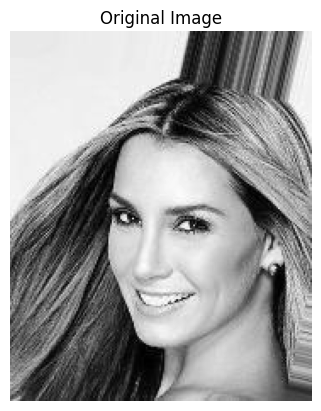

In [7]:
import cv2
import matplotlib.pyplot as plt
import os
dataset_path='/content/img_align_celeba/img_align_celeba/'

image_path = os.path.join(dataset_path, '000001.jpg')
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()


In [8]:
dataset_path = '/content/img_align_celeba/img_align_celeba/'

input_folder = os.path.join('/content/CelebA/', 'input_images')
output_folder = os.path.join('/content/CelebA/', 'sobel_images')
output_folder1 = os.path.join('/content/CelebA/', 'sobel_images1')

os.makedirs(input_folder, exist_ok=True)
os.makedirs(output_folder, exist_ok=True)
os.makedirs(output_folder1, exist_ok=True)

print(f"Created directories:\n{input_folder}\n{output_folder}\n{output_folder1}")


Created directories:
/content/CelebA/input_images
/content/CelebA/sobel_images
/content/CelebA/sobel_images1


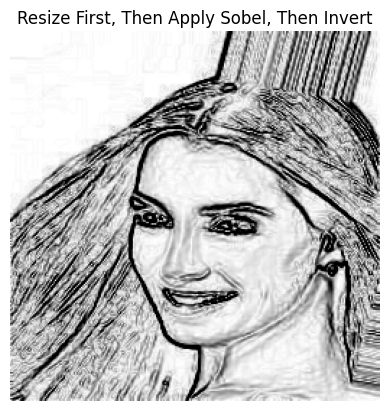

In [9]:
import cv2
import matplotlib.pyplot as plt

# Load the image
dataset_path='/content/img_align_celeba/img_align_celeba/'

img_path = os.path.join(dataset_path, '000001.jpg')

img = cv2.imread(img_path)

# Resize the image to 256x256
img_resized = cv2.resize(img, (256, 256))

# Convert the resized image to grayscale (necessary for Sobel)
gray_img = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)

# Apply Sobel filter on the resized grayscale image
sobel_x = cv2.Sobel(gray_img, cv2.CV_64F, 1, 0, ksize=3)  # Sobel in x-direction
sobel_y = cv2.Sobel(gray_img, cv2.CV_64F, 0, 1, ksize=3)  # Sobel in y-direction
sobel_combined = cv2.magnitude(sobel_x, sobel_y)  # Combine both directions

# Display the result
sobel_inverted = cv2.bitwise_not(cv2.convertScaleAbs(sobel_combined))

# Display the result
plt.imshow(sobel_inverted, cmap='gray')
plt.title('Resize First, Then Apply Sobel, Then Invert')
plt.axis('off')
plt.show()


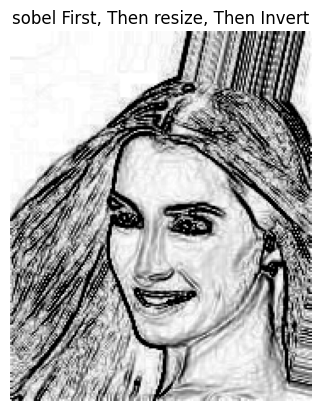

In [10]:
import cv2
import matplotlib.pyplot as plt

dataset_path='/content/img_align_celeba/img_align_celeba/'

img_path = os.path.join(dataset_path, '000001.jpg')

img = cv2.imread(img_path)

# Convert the original image to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Sobel filter on the original grayscale image
sobel_x = cv2.Sobel(gray_img, cv2.CV_64F, 1, 0, ksize=3)  # Sobel in x-direction
sobel_y = cv2.Sobel(gray_img, cv2.CV_64F, 0, 1, ksize=3)  # Sobel in y-direction
sobel_combined = cv2.magnitude(sobel_x, sobel_y)  # Combine both directions

# Resize the result of the Sobel operation to 256x256
sobel_resized = cv2.resize(sobel_combined, (256, 256))

# Display the result
sobel_inverted = cv2.bitwise_not(cv2.convertScaleAbs(sobel_combined))

# Display the result
plt.imshow(sobel_inverted, cmap='gray')
plt.title('sobel First, Then resize, Then Invert')
plt.axis('off')
plt.show()


In [11]:
import os
import cv2
import shutil
from glob import glob

source_dir = '/content/img_align_celeba/img_align_celeba/'
destination_dir = '/content/CelebA/input_images/'

if not os.path.exists(destination_dir):
    os.makedirs(destination_dir)

image_paths = glob(os.path.join(source_dir, '*.jpg'))

batch_size = 1000

for i in range(0, len(image_paths), batch_size):
    batch_files = image_paths[i:i + batch_size]

    for img_path in batch_files:
        img_name = os.path.basename(img_path)
        img = cv2.imread(img_path)
        img_resized = cv2.resize(img, (256, 256))

        resized_img_path = os.path.join(destination_dir, img_name)

        cv2.imwrite(resized_img_path, img_resized)


print(f"Moved {len(image_paths)} files to {destination_dir}")


Moved 202599 files to /content/CelebA/input_images/


In [12]:
image_paths = glob(os.path.join(input_folder, '*.jpg'))

def apply_sobel(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
    sobel_combined = cv2.magnitude(sobelx, sobely)
    sobel_combined = cv2.convertScaleAbs(sobel_combined)
    return sobel_combined

def apply_negative(image):
    negative_image = cv2.bitwise_not(image)
    return negative_image

for img_path in image_paths:
    img_name = os.path.basename(img_path)
    img = cv2.imread(img_path)
    sobel_img = apply_sobel(img)
    negative_img = apply_negative(sobel_img)
    negative_img_path = os.path.join(output_folder, img_name)
    cv2.imwrite(negative_img_path, negative_img)

print(f"Processed {len(image_paths)} images and saved to {output_folder}")


Processed 202599 images and saved to /content/CelebA/sobel_images


In [13]:
image_paths1 = glob(os.path.join(source_dir, '*.jpg'))

for img_path in image_paths1:
    img_name = os.path.basename(img_path)
    img = cv2.imread(img_path)
    sobel_img = apply_sobel(img)
    negative_img = apply_negative(sobel_img)
    img_resized = cv2.resize(negative_img, (256, 256))
    processed_img_path = os.path.join(output_folder1, img_name)
    cv2.imwrite(processed_img_path, img_resized)
print(f"Processed {len(image_paths1)} images and saved to {output_folder1}")

Processed 202599 images and saved to /content/CelebA/sobel_images1


In [14]:
import os

image_files = [f for f in os.listdir(output_folder)
if f.endswith('.jpg')]

# Count the number of images
num_images = len(image_files)

print(f"Number of images in Sobel folder: {num_images}")


Number of images in Sobel folder: 202599


In [15]:
!zip -r input_images.zip /content/CelebA/input_images/
!zip -r sobel_images.zip /content/CelebA/sobel_images/
!zip -r sobel_images1.zip /content/CelebA/sobel_images1/


Streaming output truncated to the last 5000 lines.
  adding: content/CelebA/sobel_images1/154143.jpg (deflated 1%)
  adding: content/CelebA/sobel_images1/131171.jpg (deflated 1%)
  adding: content/CelebA/sobel_images1/155098.jpg (deflated 1%)
  adding: content/CelebA/sobel_images1/115444.jpg (deflated 1%)
  adding: content/CelebA/sobel_images1/088836.jpg (deflated 0%)
  adding: content/CelebA/sobel_images1/052929.jpg (deflated 1%)
  adding: content/CelebA/sobel_images1/007481.jpg (deflated 1%)
  adding: content/CelebA/sobel_images1/082319.jpg (deflated 1%)
  adding: content/CelebA/sobel_images1/095380.jpg (deflated 1%)
  adding: content/CelebA/sobel_images1/002234.jpg (deflated 1%)
  adding: content/CelebA/sobel_images1/054437.jpg (deflated 1%)
  adding: content/CelebA/sobel_images1/173087.jpg (deflated 1%)
  adding: content/CelebA/sobel_images1/189574.jpg (deflated 1%)
  adding: content/CelebA/sobel_images1/195367.jpg (deflated 0%)
  adding: content/CelebA/sobel_images1/169411.jpg (de

In [16]:
!cp /content/input_images.zip /content/drive/MyDrive/Dataset

In [17]:
!cp /content/sobel_images.zip /content/drive/MyDrive/Dataset

In [18]:
!cp /content/sobel_images1.zip /content/drive/MyDrive/Dataset